In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/PFE

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/PFE


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import numpy as np
from torch.utils.data import TensorDataset
from prep_dataset import *
from models.GCN_model import *
from models.GIN_model import *
from train import *

In [0]:
# Setting up the default data type
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device('cuda') if use_cuda else torch.device('cpu')
dtype = torch.float32
torch.set_default_tensor_type(FloatTensor)

In [0]:
ds_name = "PTC_MR"
batch_size = 128
n_folds = 10
dataset, info = prep_dataset(ds_name)

In [0]:
learning_rate = 0.0005
num_epochs = 100
n_features = info[0]
hidden_dim = 20
n_classes = info[1]
dropout = 0.01
n_gnn_layers = 5
n_mlp_layers = 2

Percentage of class 0: 55.81%
Percentage of class 1: 44.19%


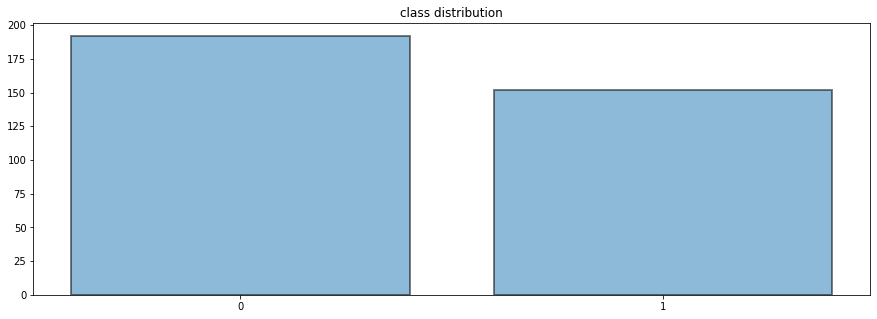

In [6]:
counts = np.zeros(n_classes)
h_labels = dataset[:][2]
unique, count = np.unique(h_labels.cpu(), return_counts=True)
counts += count
###
for cl in unique:
    print("Percentage of class {}: {:.2f}%".format(cl, 100*counts[cl]/sum(counts)))
####
fig = plt.figure(figsize=(15,5))
ax = plt.axes()
ax.bar(unique, counts, align='center', alpha=0.5, edgecolor='black', linewidth=2)
ax.set_title("class distribution")
ax.set_xticks(unique)
plt.show()

Fold no. 1, epoch [0/100], Loss: 11.0917, train_acc: 54.00
Fold no. 1, epoch [10/100], Loss: 1.1115, train_acc: 66.00
Fold no. 1, epoch [20/100], Loss: 0.5124, train_acc: 72.00
Fold no. 1, epoch [30/100], Loss: 0.5315, train_acc: 74.00
Fold no. 1, epoch [40/100], Loss: 0.3746, train_acc: 80.00
Fold no. 1, epoch [50/100], Loss: 0.3216, train_acc: 81.00
Fold no. 1, epoch [60/100], Loss: 0.4118, train_acc: 85.00
Fold no. 1, epoch [70/100], Loss: 0.4060, train_acc: 85.00
Fold no. 1, epoch [80/100], Loss: 0.4546, train_acc: 88.00
Fold no. 1, epoch [90/100], Loss: 0.1985, train_acc: 91.00
Fold no. 2, epoch [0/100], Loss: 10.5505, train_acc: 54.00
Fold no. 2, epoch [10/100], Loss: 1.3277, train_acc: 62.00
Fold no. 2, epoch [20/100], Loss: 0.8892, train_acc: 68.00
Fold no. 2, epoch [30/100], Loss: 0.5912, train_acc: 77.00
Fold no. 2, epoch [40/100], Loss: 0.5489, train_acc: 78.00
Fold no. 2, epoch [50/100], Loss: 0.3165, train_acc: 84.00
Fold no. 2, epoch [60/100], Loss: 0.2568, train_acc: 87.

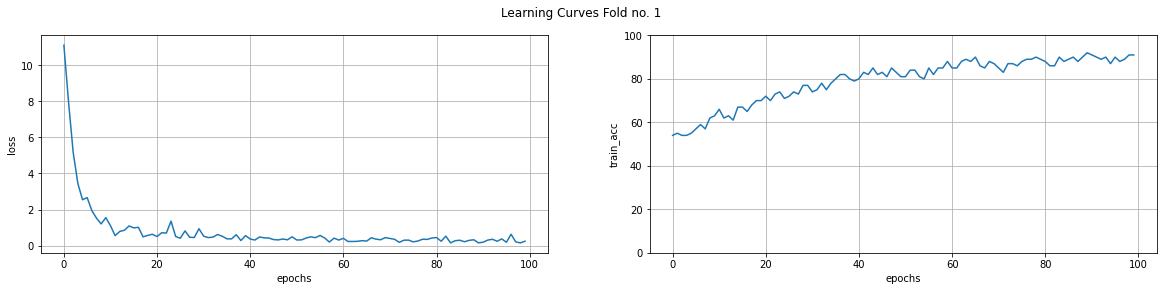

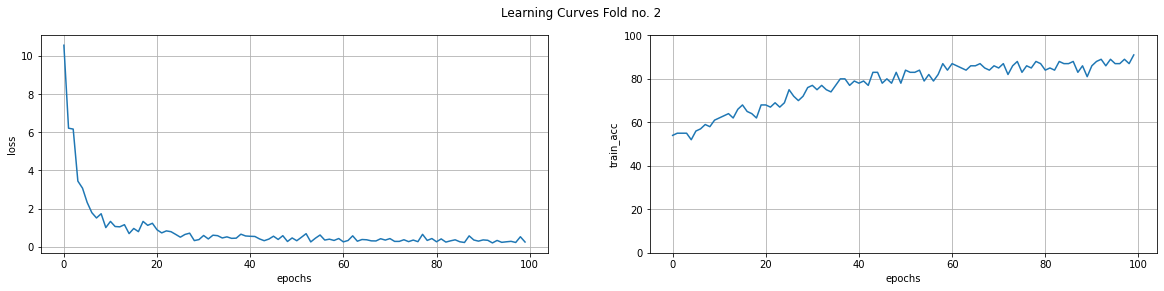

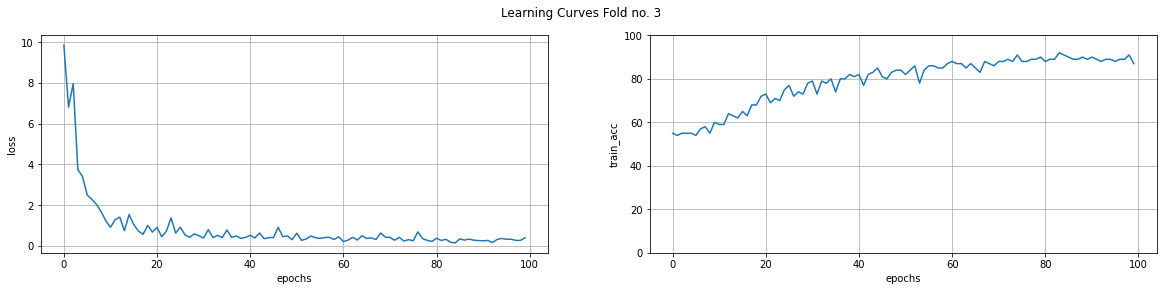

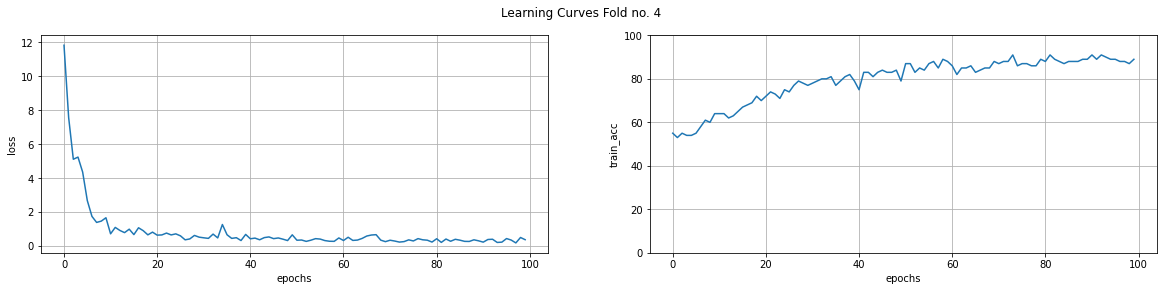

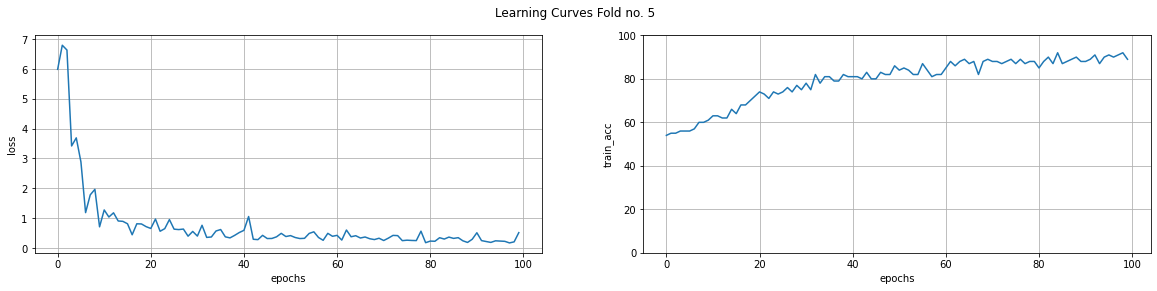

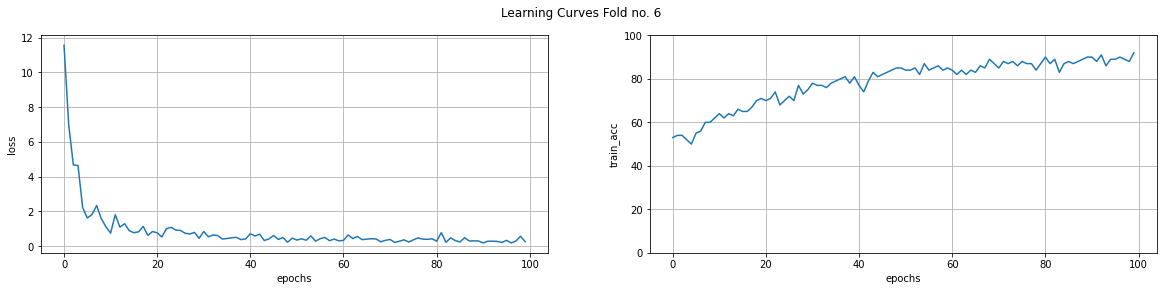

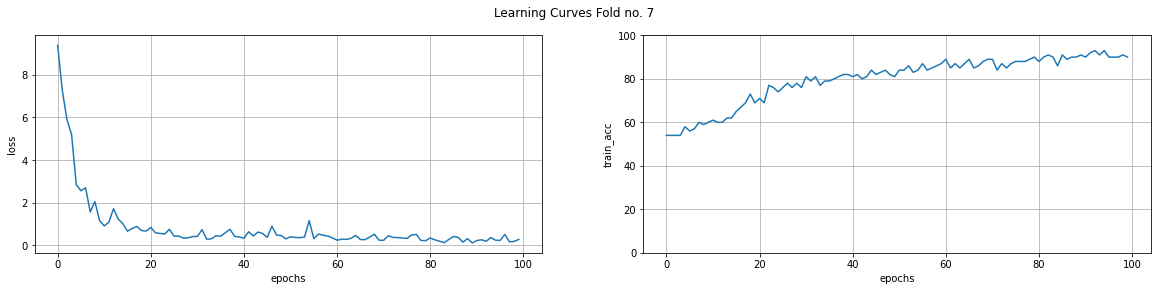

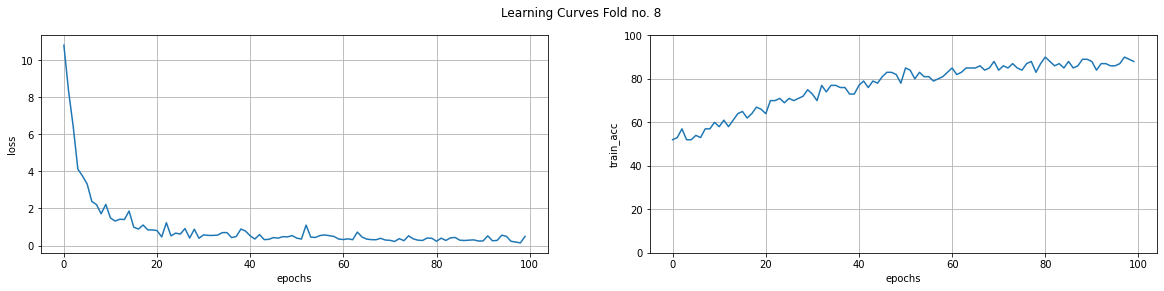

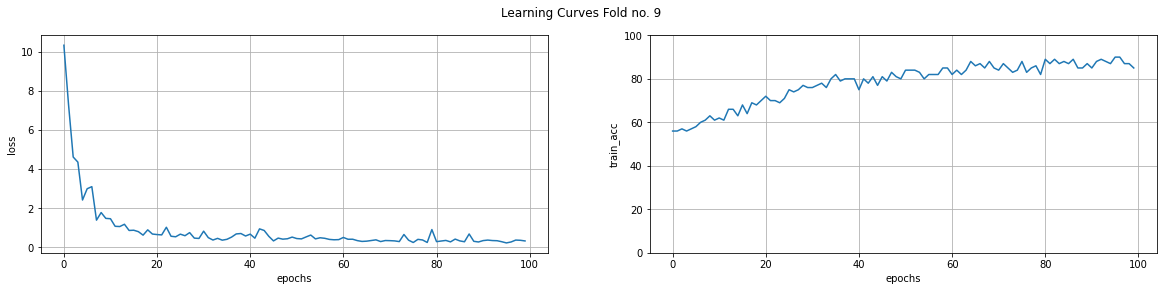

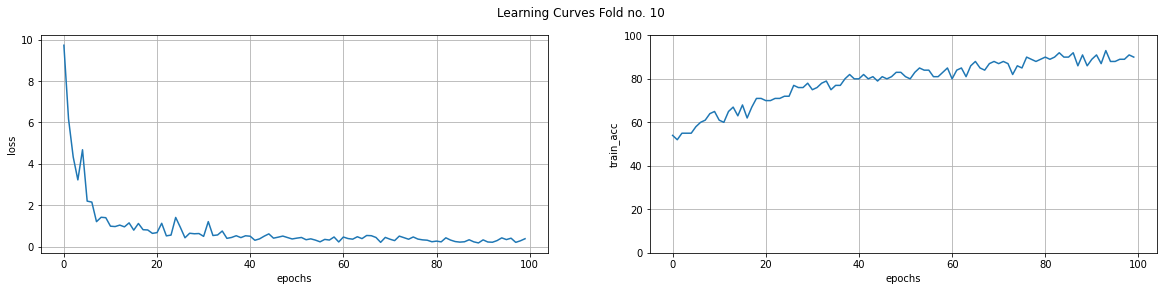

Test accuracy for each fold:
57 54 40 54 47 41 50 73 44 55
Average test accuracy across the 10 folds: 51.50
Max test accuracy across the 10 folds: 73.00


In [7]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10)

Fold no. 1, epoch [0/100], Loss: 0.7713, train_acc: 54.00
Fold no. 1, epoch [10/100], Loss: 0.7145, train_acc: 55.00
Fold no. 1, epoch [20/100], Loss: 0.6839, train_acc: 56.00
Fold no. 1, epoch [30/100], Loss: 0.6807, train_acc: 56.00
Fold no. 1, epoch [40/100], Loss: 0.6835, train_acc: 56.00
Fold no. 1, epoch [50/100], Loss: 0.6097, train_acc: 58.00
Fold no. 1, epoch [60/100], Loss: 0.6355, train_acc: 59.00
Fold no. 1, epoch [70/100], Loss: 0.6372, train_acc: 60.00
Fold no. 1, epoch [80/100], Loss: 0.6069, train_acc: 62.00
Fold no. 1, epoch [90/100], Loss: 0.6484, train_acc: 64.00
Fold no. 2, epoch [0/100], Loss: 0.8133, train_acc: 56.00
Fold no. 2, epoch [10/100], Loss: 0.7887, train_acc: 55.00
Fold no. 2, epoch [20/100], Loss: 0.6946, train_acc: 57.00
Fold no. 2, epoch [30/100], Loss: 0.7333, train_acc: 58.00
Fold no. 2, epoch [40/100], Loss: 0.7033, train_acc: 59.00
Fold no. 2, epoch [50/100], Loss: 0.6086, train_acc: 60.00
Fold no. 2, epoch [60/100], Loss: 0.6876, train_acc: 62.00

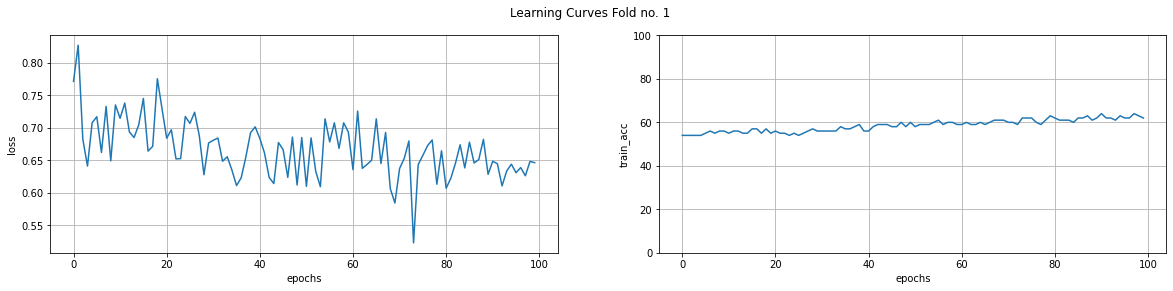

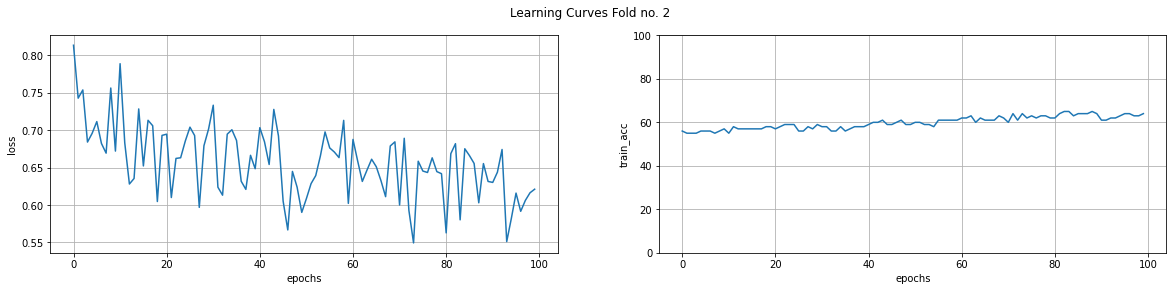

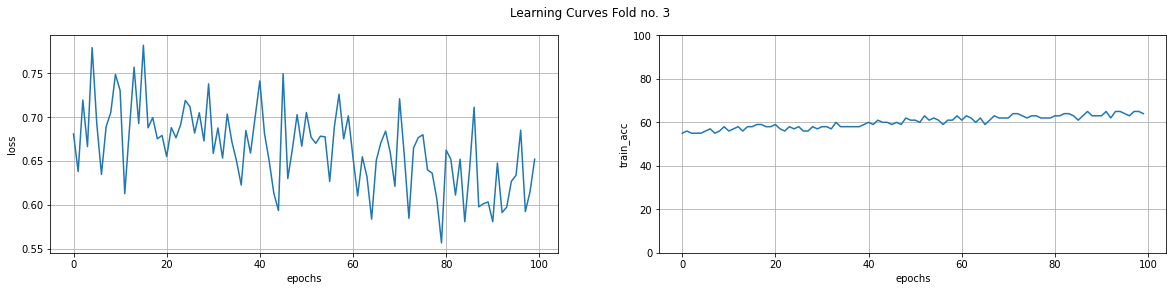

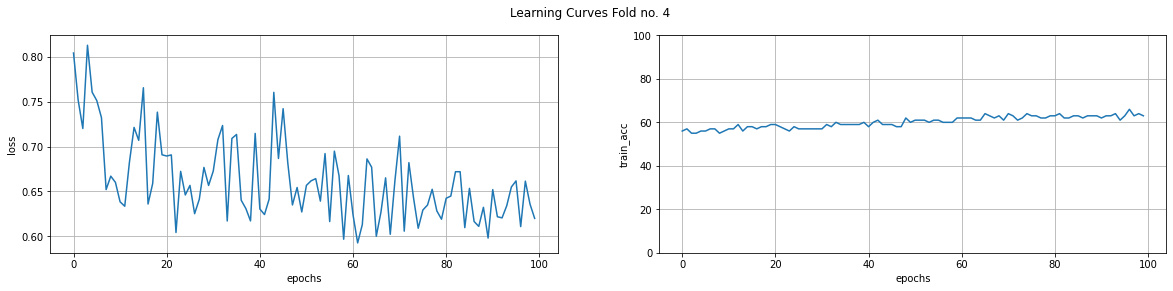

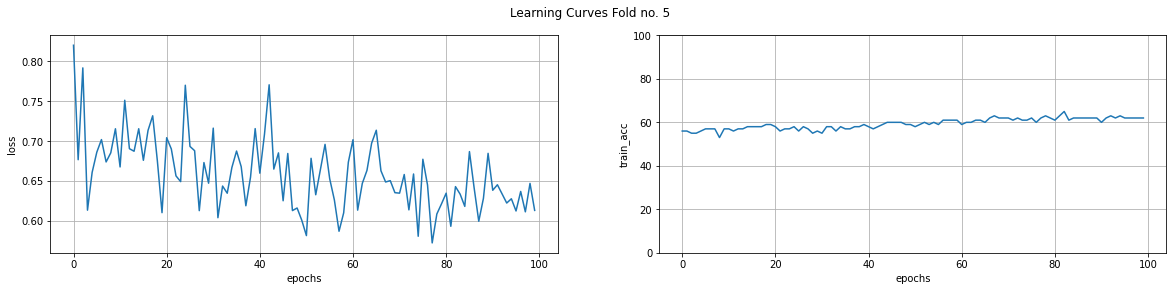

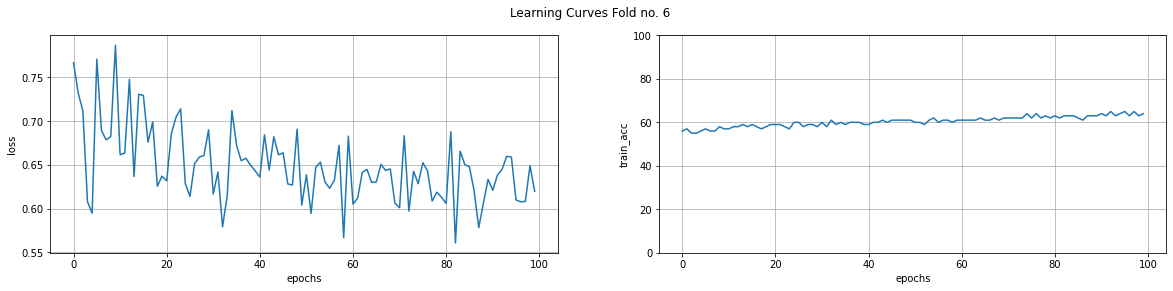

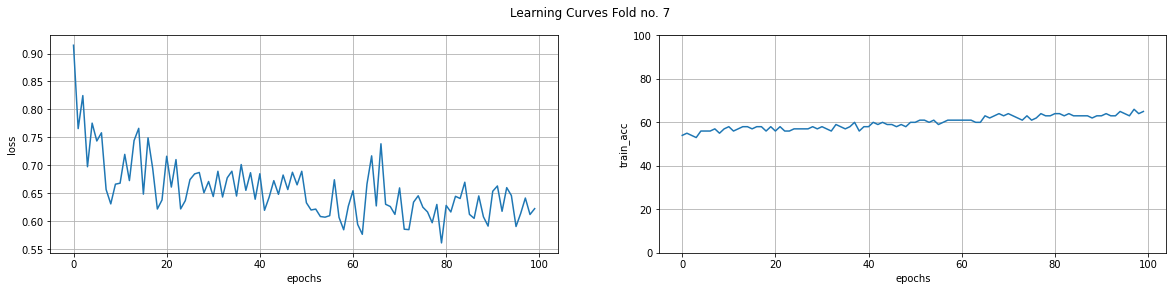

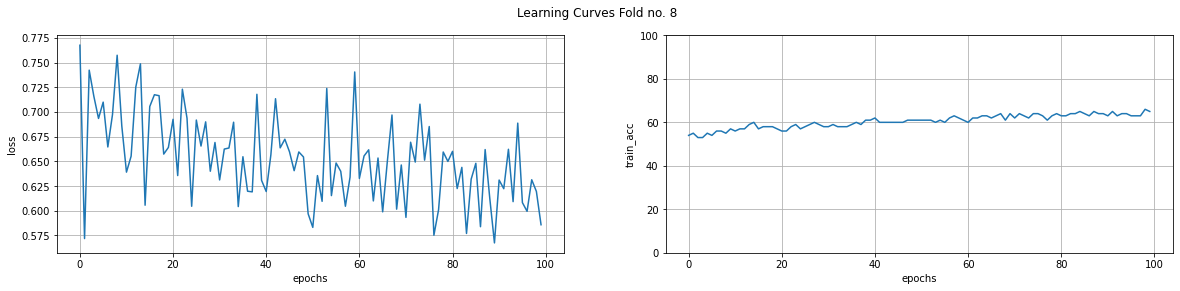

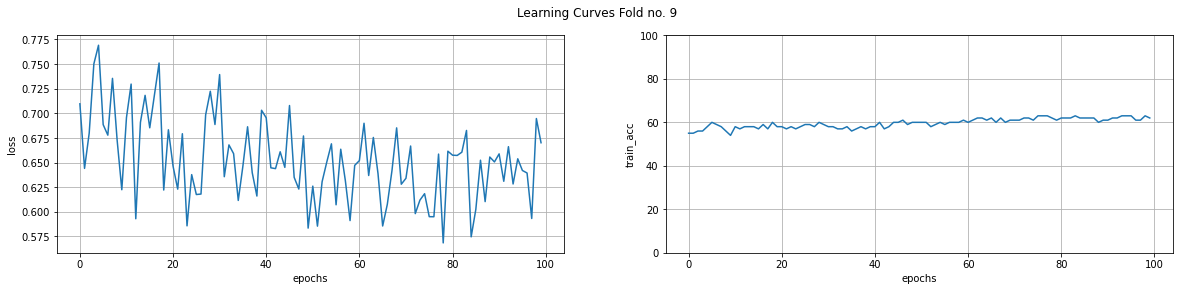

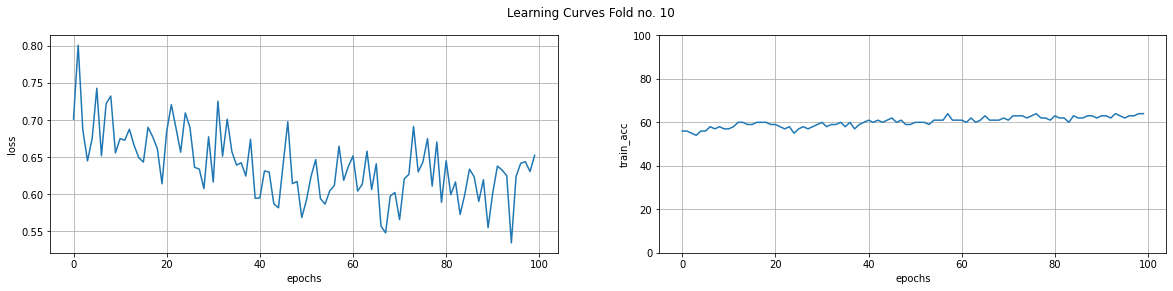

Test accuracy for each fold:
65 57 54 57 55 47 44 55 50 44
Average test accuracy across the 10 folds: 52.80
Max test accuracy across the 10 folds: 65.00


In [8]:
model = TwoLayerGCN(input_dim=n_features, hidden_dim=hidden_dim, 
                    n_classes=n_classes, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10)

models/layers.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  scores = F.softmax(scores).flatten()


Fold no. 1, epoch [0/100], Loss: 1.3388, train_acc: 55.00
Fold no. 1, epoch [10/100], Loss: 0.7727, train_acc: 54.00
Fold no. 1, epoch [20/100], Loss: 0.6855, train_acc: 58.00
Fold no. 1, epoch [30/100], Loss: 0.6221, train_acc: 58.00
Fold no. 1, epoch [40/100], Loss: 0.6247, train_acc: 61.00
Fold no. 1, epoch [50/100], Loss: 0.5754, train_acc: 59.00
Fold no. 1, epoch [60/100], Loss: 0.5636, train_acc: 60.00
Fold no. 1, epoch [70/100], Loss: 0.6363, train_acc: 67.00
Fold no. 1, epoch [80/100], Loss: 0.5855, train_acc: 63.00
Fold no. 1, epoch [90/100], Loss: 0.6405, train_acc: 63.00
Fold no. 2, epoch [0/100], Loss: 1.3247, train_acc: 56.00
Fold no. 2, epoch [10/100], Loss: 0.6315, train_acc: 55.00
Fold no. 2, epoch [20/100], Loss: 0.6607, train_acc: 59.00
Fold no. 2, epoch [30/100], Loss: 0.6578, train_acc: 55.00
Fold no. 2, epoch [40/100], Loss: 0.6108, train_acc: 60.00
Fold no. 2, epoch [50/100], Loss: 0.7020, train_acc: 62.00
Fold no. 2, epoch [60/100], Loss: 0.6585, train_acc: 56.00

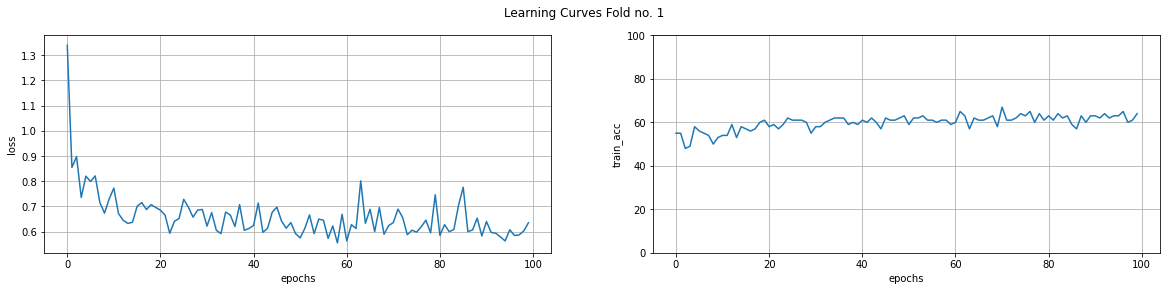

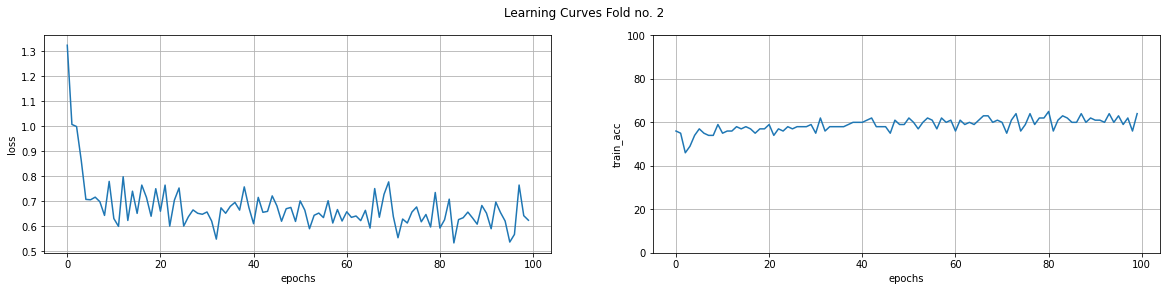

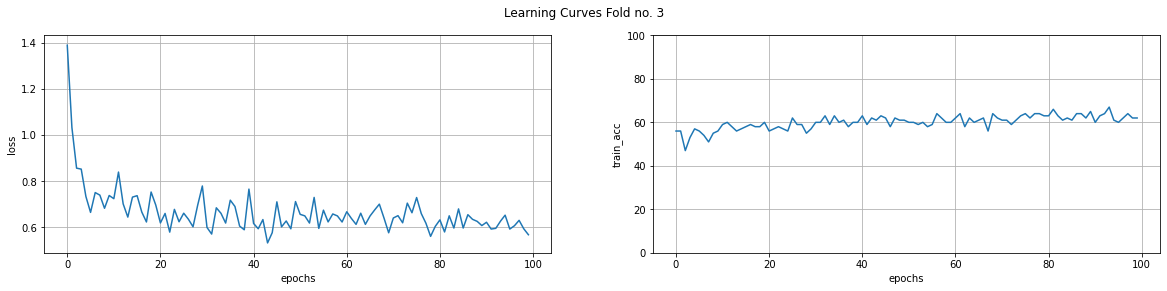

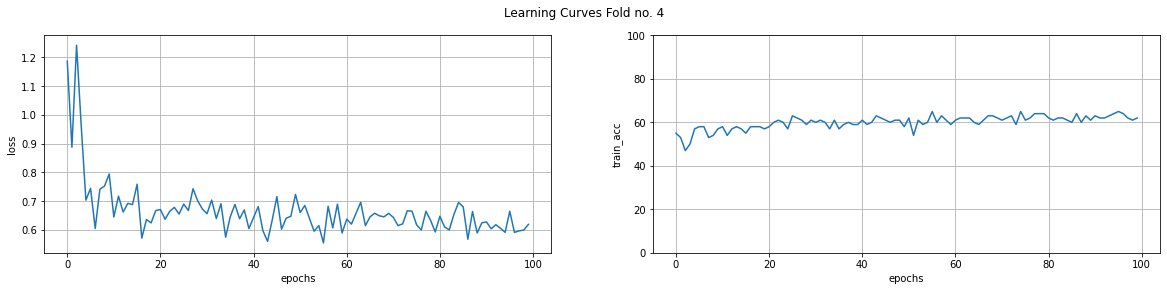

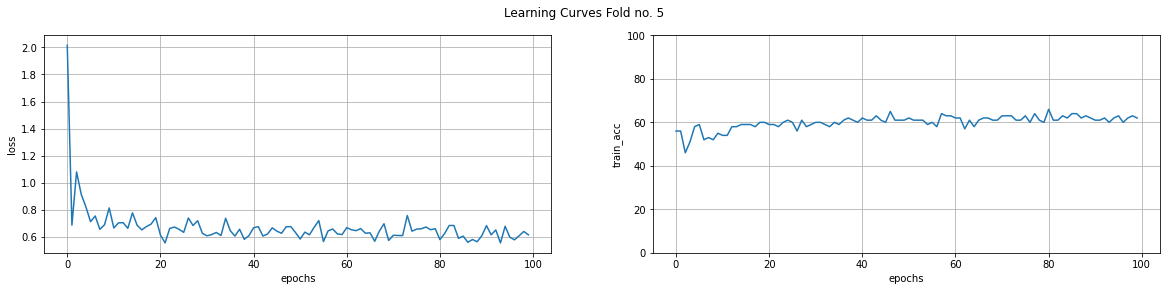

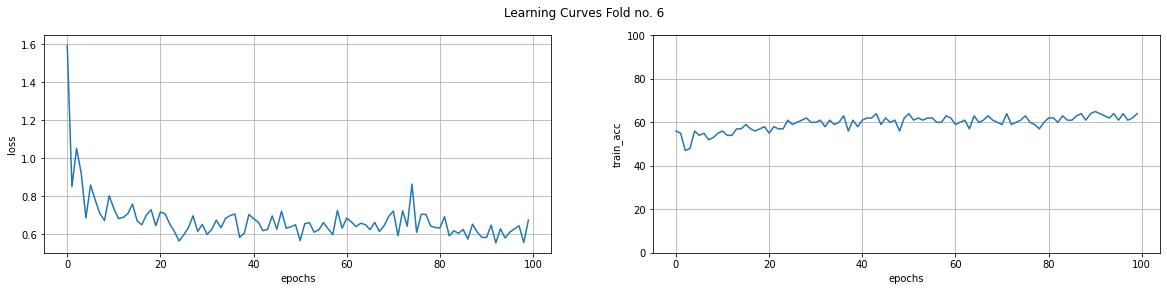

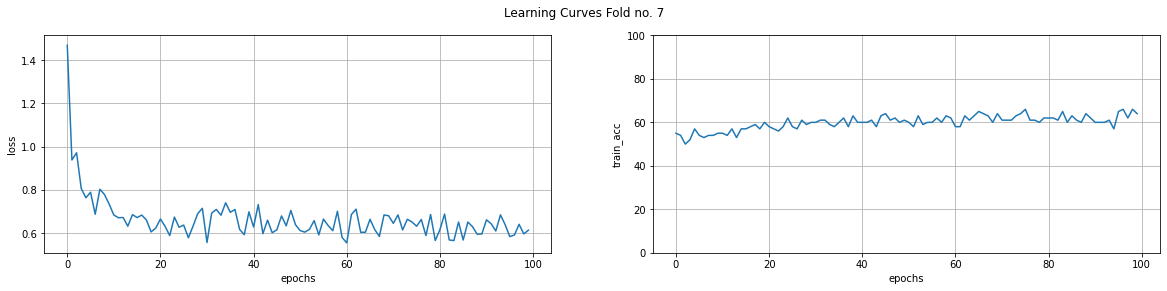

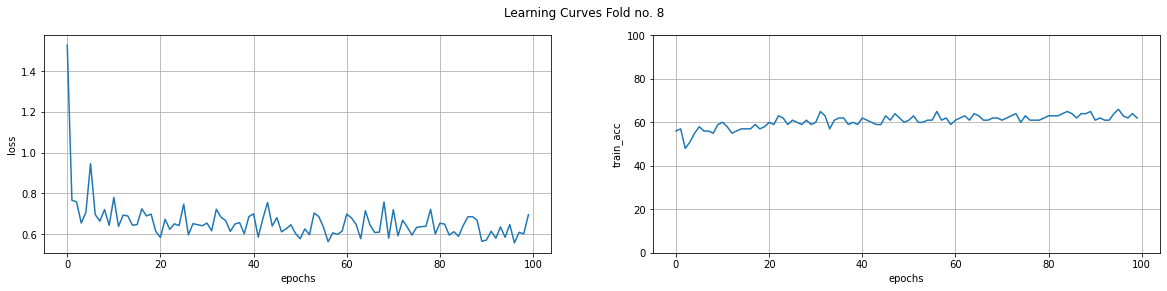

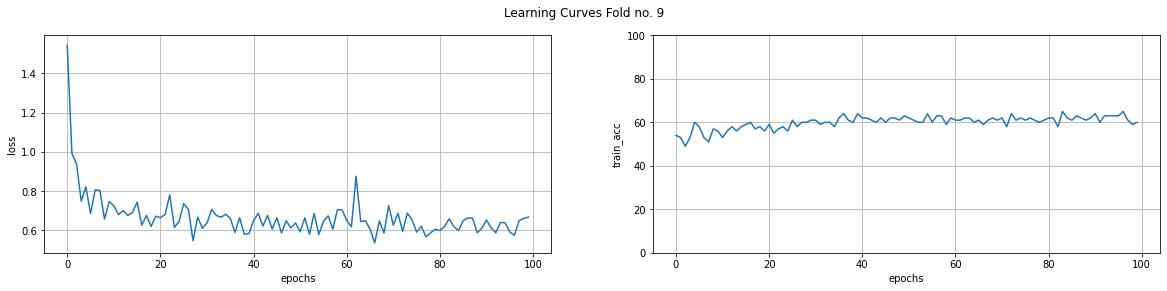

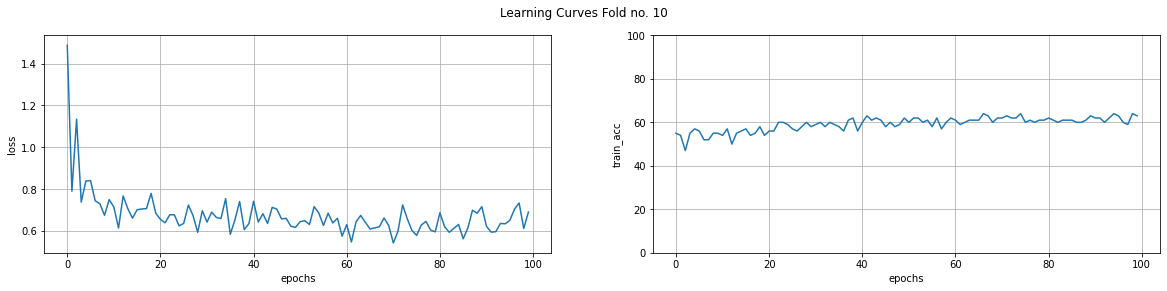

Test accuracy for each fold:
60 57 57 45 44 52 44 50 64 52
Average test accuracy across the 10 folds: 52.50
Max test accuracy across the 10 folds: 64.00


In [9]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10)

models/layers.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  scores = F.softmax(scores).flatten()


Fold no. 1, epoch [0/100], Loss: 1.4755, train_acc: 54.00
Fold no. 1, epoch [10/100], Loss: 1.1128, train_acc: 58.00
Fold no. 1, epoch [20/100], Loss: 0.8154, train_acc: 58.00
Fold no. 1, epoch [30/100], Loss: 0.6130, train_acc: 59.00
Fold no. 1, epoch [40/100], Loss: 0.6968, train_acc: 59.00
Fold no. 1, epoch [50/100], Loss: 0.7316, train_acc: 62.00
Fold no. 1, epoch [60/100], Loss: 0.6747, train_acc: 62.00
Fold no. 1, epoch [70/100], Loss: 0.6650, train_acc: 61.00
Fold no. 1, epoch [80/100], Loss: 0.6310, train_acc: 62.00
Fold no. 1, epoch [90/100], Loss: 0.6175, train_acc: 63.00
Fold no. 2, epoch [0/100], Loss: 1.4469, train_acc: 54.00
Fold no. 2, epoch [10/100], Loss: 1.1676, train_acc: 55.00
Fold no. 2, epoch [20/100], Loss: 0.6951, train_acc: 58.00
Fold no. 2, epoch [30/100], Loss: 0.7364, train_acc: 59.00
Fold no. 2, epoch [40/100], Loss: 0.6870, train_acc: 60.00
Fold no. 2, epoch [50/100], Loss: 0.7229, train_acc: 59.00
Fold no. 2, epoch [60/100], Loss: 0.6927, train_acc: 58.00

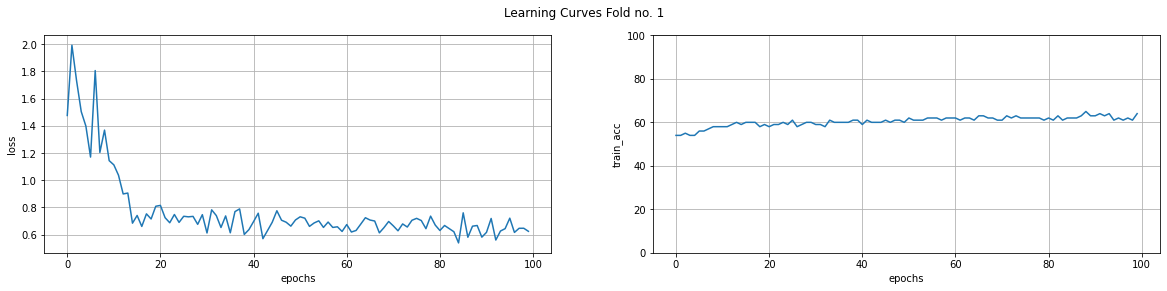

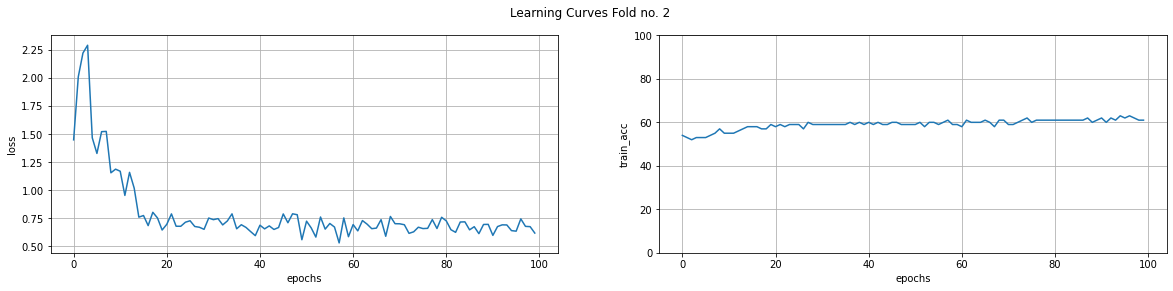

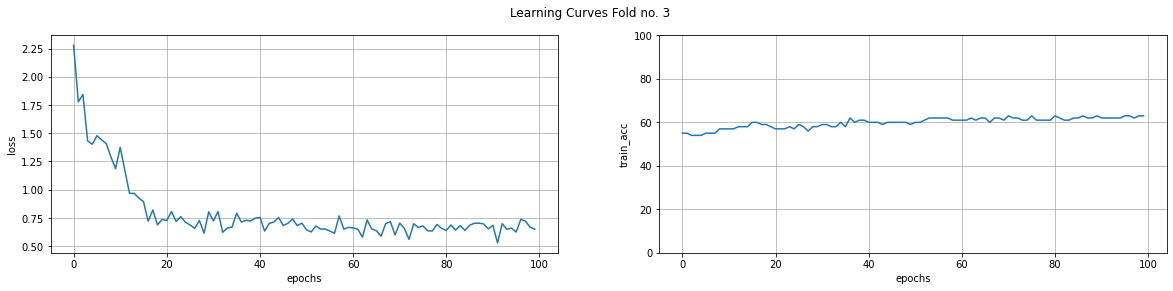

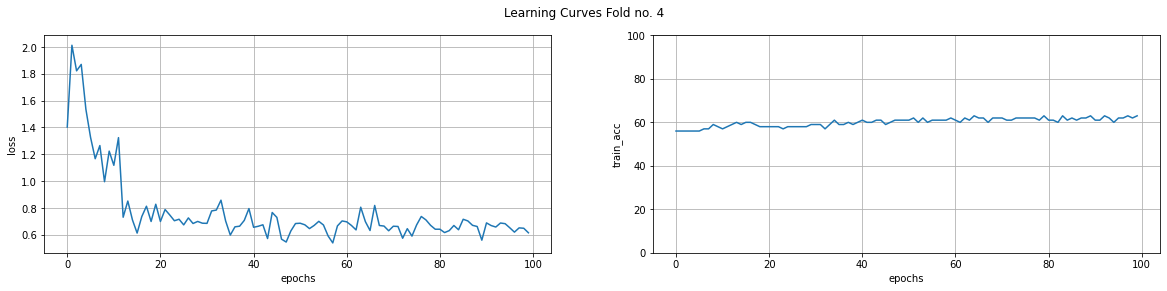

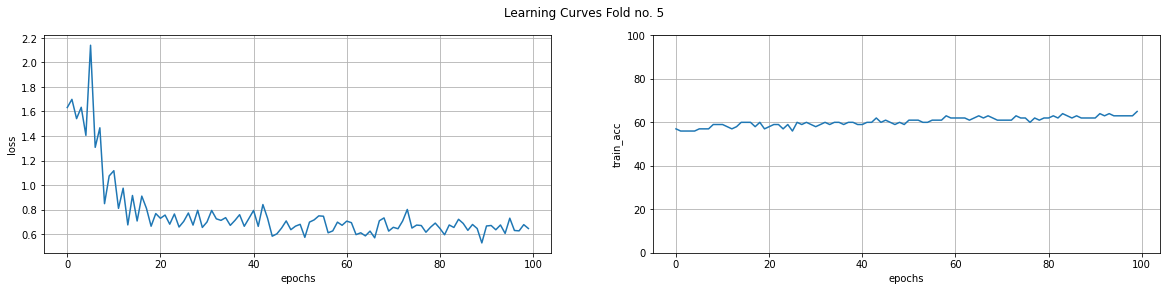

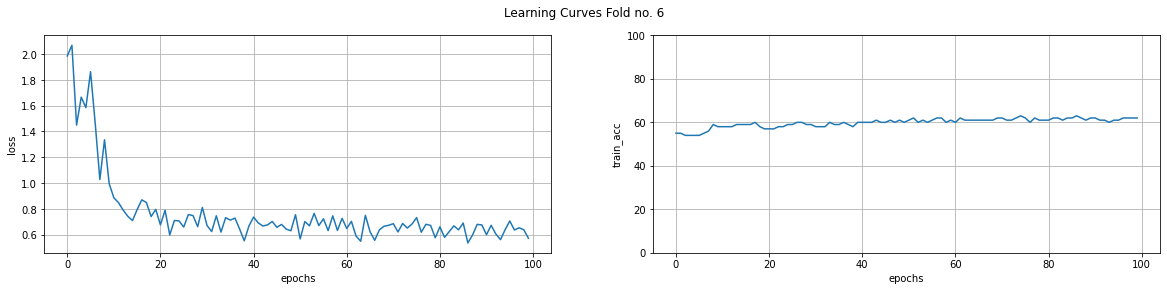

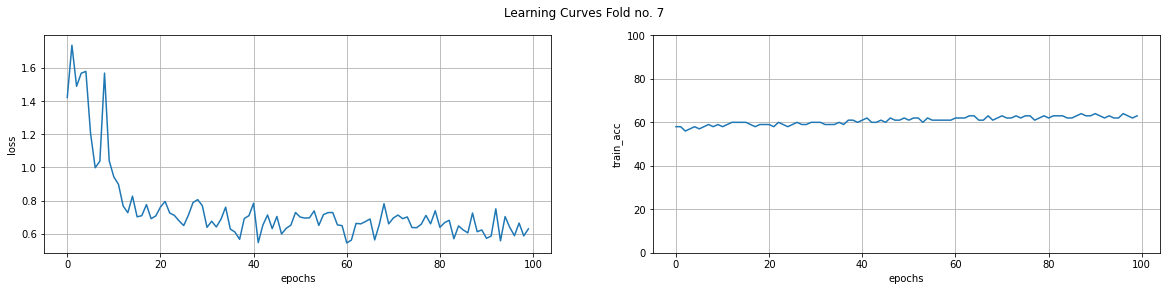

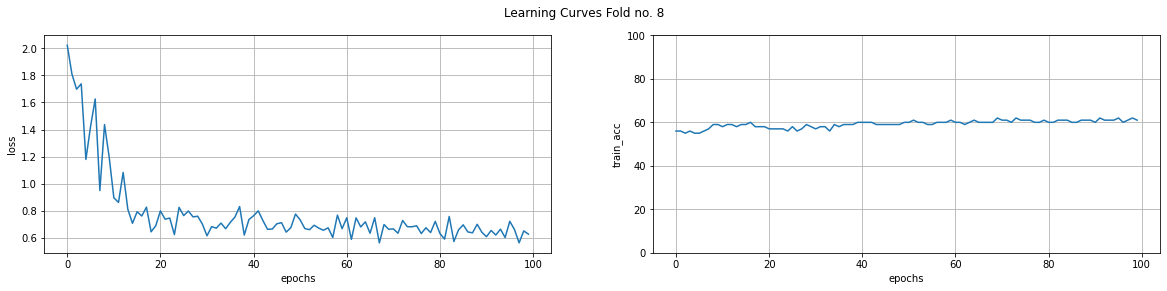

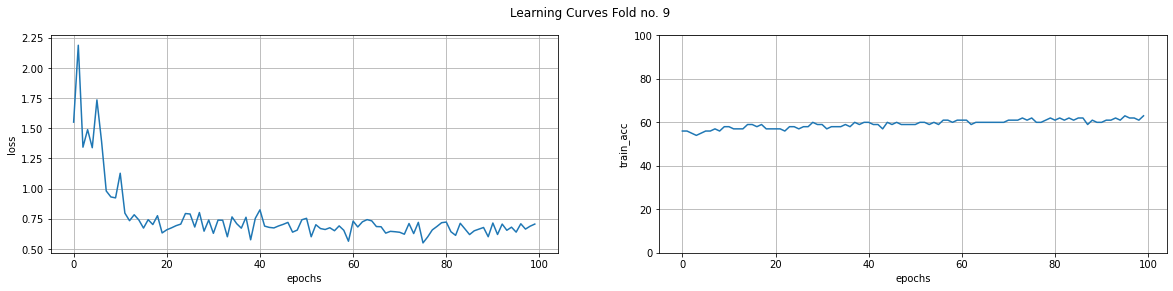

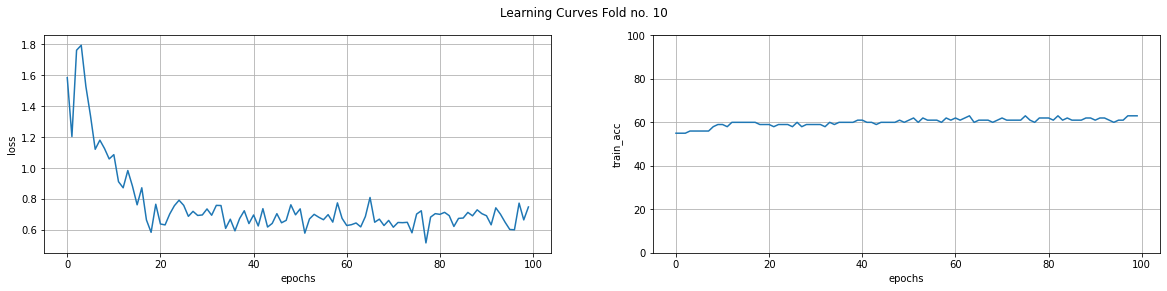

Test accuracy for each fold:
45 54 60 60 67 52 58 67 67 55
Average test accuracy across the 10 folds: 58.50
Max test accuracy across the 10 folds: 67.00


In [10]:
model = TwoLayerGCN(input_dim=n_features, hidden_dim=hidden_dim, 
                    n_classes=n_classes, dropout=dropout, attention=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10)